# LEAD SCORING CASE STUDY

### The Approach

1. Import the necessary libraries
2. Read the dataset
3.  Data Analysis - Checking the no. of rows, columns, datatypes, missing values, mean, median, count etc
4.  Data Cleansing -
Replacing values that do not make any sense with NaN, Removing columns that have very high number of missing percentage, Removing columns that have been created by sales team which are not required for analysis, Removing highly skewed variables.Imputing values for columns where missing percentage is not very high or not very low.Dropping rows from columns where null percentage is very low.
5. Outlier Analysis
6.  EDA - Univariate, Bivariate Analysis
7.  Data Preparation
Creating dummies for categorical variables
8. Train Test Split
70-30 division, Scaling of continuous variables
9. Model Building
Selecting top 15 variables using RFE and then apply GLM model, check the P values and VIF and remove the variables accordingly.
10. Metric Evaluation
Metrics such as accuracy, sensitivity, specificity, Precision, Recall are calculated on teh training dataset and then on the test dataset.Assume a cut-off value of 0.5 for start and then find the optimal value using the probability cut-off plots.

In [265]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [266]:
# import necessary libraries

# Import necessary pandas libraries
import numpy as np
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import scaling library
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import libraries for logistic regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import libraries for Precision & Recall
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [267]:
# Read Leads dataset into "leads" dataframe
leads = pd.read_csv('Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Data Analysis

In [268]:
#['Specialization','Lead Origin','Lead Source','Do Not Email','Last Activity','Last Activity','City','Free Interview Copy','Last Notable Activity'
leads['Specialization'].value_counts()


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [269]:
# Check number of rows and columns of dataframe
leads.shape

(9240, 37)

In [270]:
# Check dataframe column details like null values and datatypes
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [271]:
# Check the numeric variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleansing

#### Replacing default value "Select" with NaN

In [272]:
# Checking presence of default value "SELECT" in column
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [273]:
# Replacing "Select" with NaN

leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [274]:
# Checking presence of default value "SELECT" in column
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [275]:
# Replacing "Select" with NaN

leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [276]:
# Checking presence of default value "SELECT" in column
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [277]:
# Replacing "Select" with NaN

leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [278]:
# Checking presence of default value "SELECT" in column
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [279]:
# Replacing "Select" with NaN

leads['City'] = leads['City'].replace('Select', np.nan)
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [280]:
# Printing the dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Checking count and percentage of missing values

In [281]:
# Check null values for the leads dataframe
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [282]:
# check percentage of null values for the leads dataframe
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping columns where null percentage is very high and columns that are not important

In [283]:
# Drop columns that have very high percentage of null values

# How did you hear about X Education - 78.46
leads = leads.drop('How did you hear about X Education' , axis=1)

# Lead Profile - 74.19
leads = leads.drop('Lead Profile' , axis=1)

# Columns created by Sales employees based on their analysis/ranking which are not important for our analysis
leads = leads.drop('Prospect ID' , axis=1)
leads = leads.drop('Lead Number' , axis=1)
leads = leads.drop('Tags' , axis=1)  # Reasons for being not interested in course
leads = leads.drop('Asymmetrique Activity Index' , axis=1)
leads = leads.drop('Asymmetrique Profile Index' , axis=1)
leads = leads.drop('Asymmetrique Activity Score' , axis=1)
leads = leads.drop('Asymmetrique Profile Score' , axis=1)
leads = leads.drop('Lead Quality' , axis=1)   # Assigned on the basis of intuition of employee

#### Checking and Dropping highly skewed columns

In [284]:
# Analysing columns to check if they are highly skewed

leads['Do Not Call'].value_counts()
# 9238,2

leads['Search'].value_counts()
# 9226,14

leads['Magazine'].value_counts()
# 9240,0

leads['Newspaper Article'].value_counts()  
# 9238,2

leads['X Education Forums'].value_counts()
# 9239,1

leads['Newspaper'].value_counts()
# 9239,1

leads['Digital Advertisement'].value_counts()
# 9236,4

leads['Through Recommendations'].value_counts()
# 9233,7

leads['Update me on Supply Chain Content'].value_counts()
# 9240,0

leads['Get updates on DM Content'].value_counts()
# 9240,0

leads['I agree to pay the amount through cheque'].value_counts()
# 9240,0

leads['What matters most to you in choosing a course'].value_counts()
# 6528,3,Rest Null

leads['Receive More Updates About Our Courses'].value_counts()
#9240,0

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [285]:
# Drop columns that are highly skewed

leads = leads.drop('Do Not Call' , axis=1)
leads = leads.drop('Search' , axis=1)
leads = leads.drop('Magazine' , axis=1)
leads = leads.drop('Newspaper Article' , axis=1)
leads = leads.drop('X Education Forums' , axis=1)
leads = leads.drop('Newspaper' , axis=1)
leads = leads.drop('Digital Advertisement' , axis=1)
leads = leads.drop('Through Recommendations' , axis=1)
leads = leads.drop('Update me on Supply Chain Content' , axis=1)
leads = leads.drop('Get updates on DM Content' , axis=1)
leads = leads.drop('I agree to pay the amount through cheque' , axis=1)
leads = leads.drop('What matters most to you in choosing a course' , axis=1)
leads = leads.drop('Receive More Updates About Our Courses', axis=1)

In [286]:
leads.shape

(9240, 14)

In [287]:
# check percentage of null values for the leads dataframe
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [288]:
# Imputing columns with less percentage of missing values
leads['Country'] = leads['Country'].fillna('India')

# Checking value_counts after imputing
leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Ghana                      2
Netherlands                2
China                      2
Uganda                     2
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Tanzania                   1
Sri Lanka                  1
Switzerland                1
Indonesia                  1
Malaysia                   1
Denmark                    1
Kenya         

<font color=grey>
<b>After imputing 'Country' column with 'India' value, we found that the column became highly skewed, so we will remove it.</b>
</font>

In [289]:
# Removing Country column as it has more than 95% data for "India" which makes it highly skewed column
leads = leads.drop('Country' , axis=1)

In [290]:
# Cleaning the Lead Source column - 2 categories Google and google which mean the same are combined to one
leads["Lead Source"].replace({'google': 'Google'}, inplace=True)

<font color=grey>
<b>Dropping rows from columns/variables where Null percentage is very less.</b>
</font>

In [291]:
# Dropping rows that have Null in these columns as the null percentage is very small
leads = leads.dropna(subset=['Lead Source','TotalVisits', 'Page Views Per Visit','Last Activity'])
leads.shape

(9074, 13)

In [292]:
# check percentage of null values for the leads dataframe
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            36.17
What is your current occupation           29.57
City                                      39.40
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Imputing Null where missing values are not so high

In [293]:
# Checking columns which have decent amount of null values
leads['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [294]:
# Imputing the Null values with "Other" as they have a decent percentage (not very less and not very huge)
leads['Specialization'] = leads['Specialization'].fillna('Not Provided')
leads['Specialization'].value_counts()

Not Provided                         3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [295]:
# Checking columns which have decent amount of null values
leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [296]:
# Imputing the Null values with "Other" as they have a decent percentage (not very less and not very huge)
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Not Provided')
leads['What is your current occupation'].value_counts()

Unemployed              5476
Not Provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [297]:
# Checking columns which have decent amount of null values
leads['City'].value_counts()

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [298]:
# Imputing the Null values with "Not Provided" as they have a decent percentage (not very less and not very huge)
leads['City'] = leads['City'].fillna('Not Provided')
leads['City'].value_counts()

Not Provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [299]:
# check percentage of null values for the leads dataframe
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [300]:
# Percentage of rows retained in the dataframe after treating all null values

print(len(leads.index)*100/9240)

98.2034632034632


<font color=grey>
<b>After all data cleaning we see that the Null percenatge is 0 for all columns and 98% rows are remaing with us.</b>
</font>

## Outlier Analysis

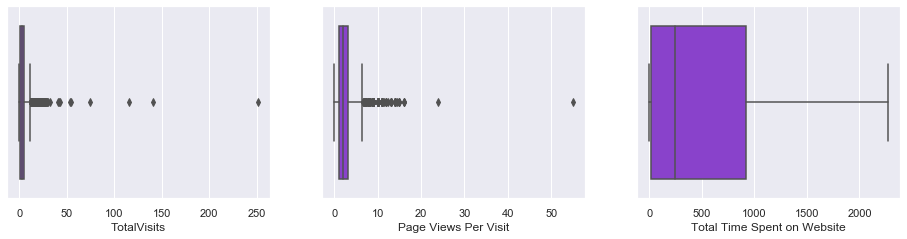

In [301]:
#visualize the variables of dataframe
plt.figure(figsize = (16,12))
plt.subplot(3, 3, 1)
sns.boxplot(x='TotalVisits', data=leads, color='blueviolet')
plt.subplot(3, 3, 2)
sns.boxplot(x='Page Views Per Visit', data=leads, color='blueviolet')
plt.subplot(3, 3, 3)
sns.boxplot(x='Total Time Spent on Website', data=leads, color='blueviolet')
plt.show()

### Outllier Treatment - Capping of outliers

In [302]:
Q1 = leads['TotalVisits'].quantile(0.01)
Q4 = leads['TotalVisits'].quantile(0.99)
leads['TotalVisits'][leads['TotalVisits'] <= Q1]=Q1
leads['TotalVisits'][leads['TotalVisits'] >= Q4]=Q4
leads.shape

(9074, 13)

In [303]:
Q1 = leads['Page Views Per Visit'].quantile(0.01)
Q4 = leads['Page Views Per Visit'].quantile(0.99)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= Q1]=Q1
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= Q4]=Q4
leads.shape

(9074, 13)

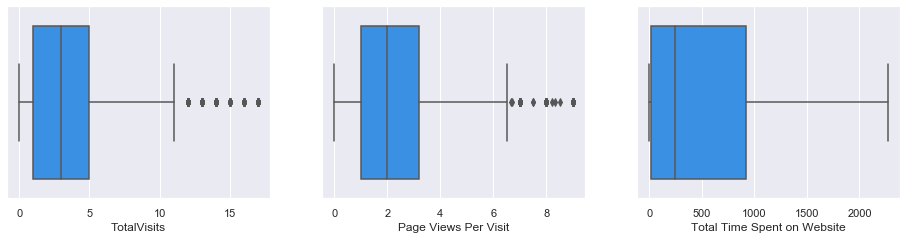

In [304]:
#visualize the variables of dataframe after outlier treatment
plt.figure(figsize = (16,12))
plt.subplot(3, 3, 1)
sns.boxplot(x='TotalVisits', data=leads, color='dodgerblue')
plt.subplot(3, 3, 2)
sns.boxplot(x='Page Views Per Visit', data=leads, color='dodgerblue')
plt.subplot(3, 3, 3)
sns.boxplot(x='Total Time Spent on Website', data=leads, color='dodgerblue')
plt.show()

<font color=grey>
<b>We had outliers only in 2 columns "TotalVisits" and "Total Time Spent on Website" and we have used capping (1-99) to remove them.</b>
</font>

In [305]:
# Checking result after Outlier Treatment
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.343178,482.887481,2.341241
std,0.485053,3.252302,545.256560,1.984635
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


## EDA on leads dataset

### Univariate Analysis

In [306]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.343178,482.887481,2.341241
std,0.485053,3.252302,545.256560,1.984635
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,17.000000,2272.000000,9.000000


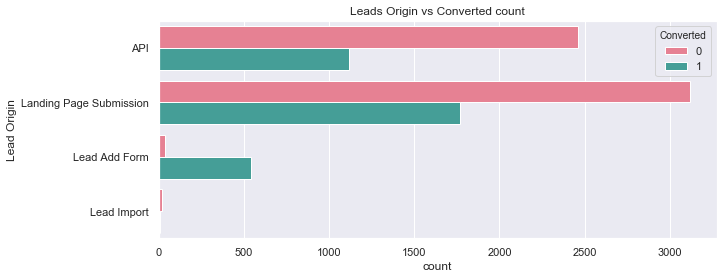

In [307]:
plt.figure(figsize = (10,4))
plt.title("Leads Origin vs Converted count")
sns.countplot(y='Lead Origin', hue='Converted', palette='husl', data =leads)
plt.show()

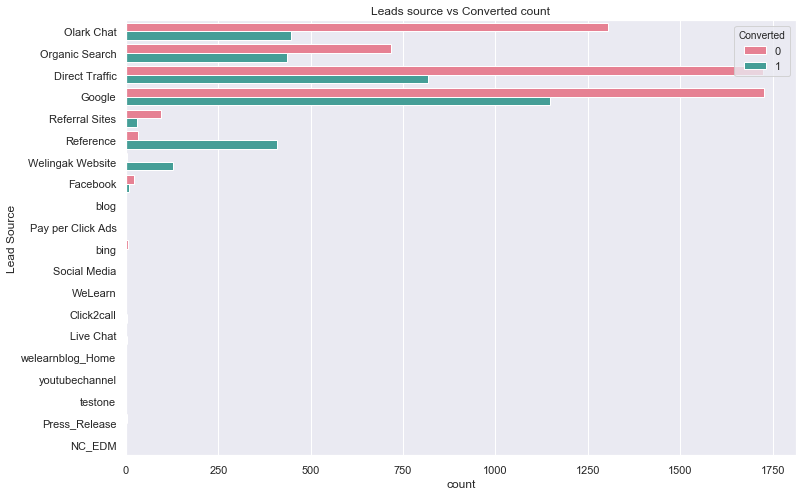

In [308]:
plt.figure(figsize = (12,8))
plt.title("Leads source vs Converted count")
sns.countplot(y='Lead Source', hue='Converted', palette='husl', data =leads)
plt.show()

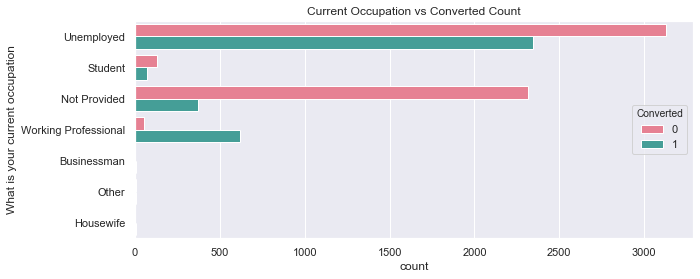

In [311]:
plt.figure(figsize = (10,4))
plt.title("Current Occupation vs Converted Count")
sns.countplot(y='What is your current occupation', hue='Converted', palette='husl', data =leads)
plt.show()

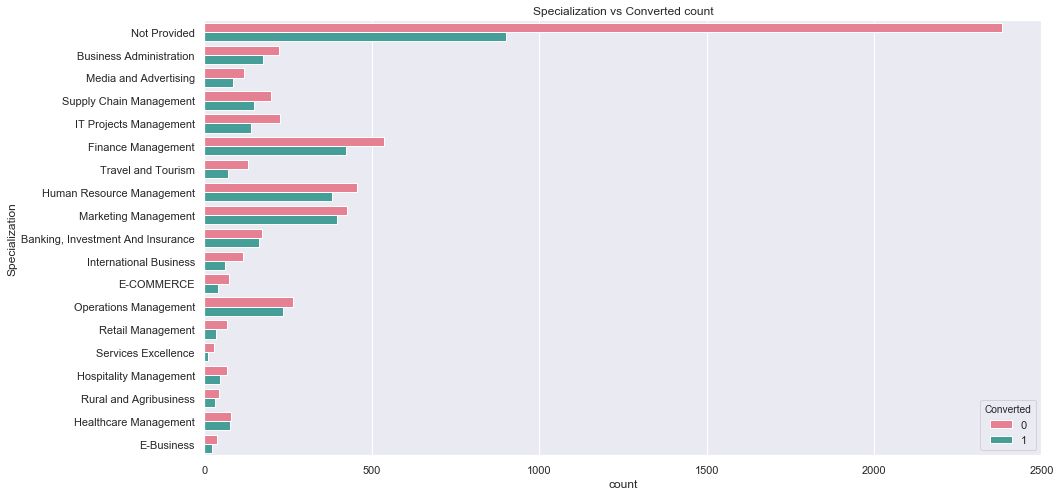

In [309]:
plt.figure(figsize = (15,8))
plt.title("Specialization vs Converted count")
sns.countplot(y='Specialization', hue='Converted', palette='husl', data =leads)
plt.show()

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Conversions based on Last Activity')
sns.countplot(y='Last Activity', hue='Converted', palette='husl', data =leads)
plt.show()

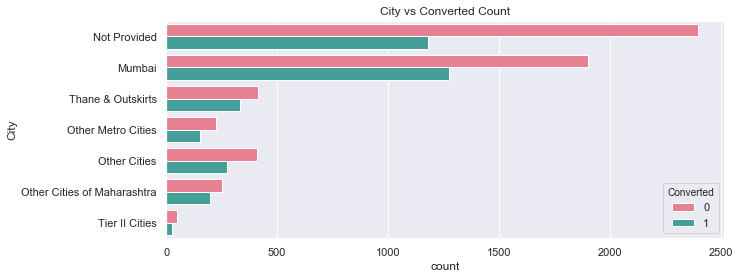

In [310]:
plt.figure(figsize = (10,4))
plt.title("City vs Converted Count")
sns.countplot(y='City', hue='Converted', palette='husl', data =leads)
plt.show()

### Bivariate Anaysis

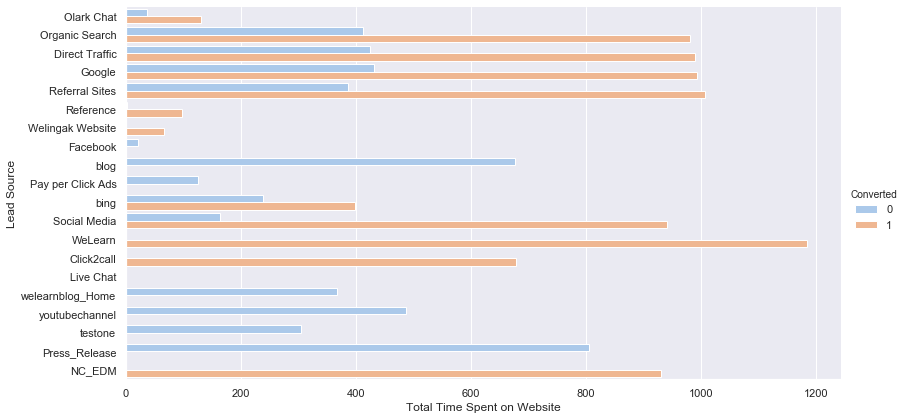

In [312]:
# Plotting the Total Visits from every Lead Source and categorizing based on Converted or not
sns.catplot(x='Total Time Spent on Website', y='Lead Source', hue='Converted', palette='pastel', data =leads, kind='bar', ci=None, height=6, aspect=2)
plt.title('Lead Source vs Time spend on Website')
plt.show()

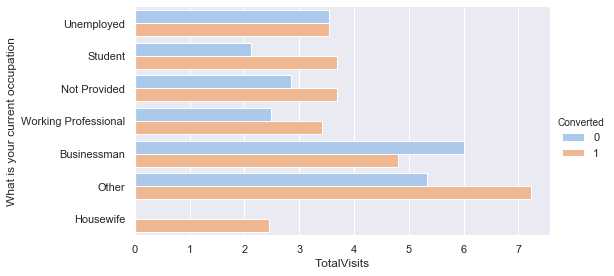

In [313]:
# Plotting the Total Visits from every Lead Source and categorizing based on Converted or not
sns.catplot(x='TotalVisits', y='What is your current occupation', hue='Converted', palette='pastel', data =leads, kind='bar', ci=None, height=4, aspect=2)
plt.title('Occupation Type vs Time Visits')
plt.show()

### Correlation Matrix

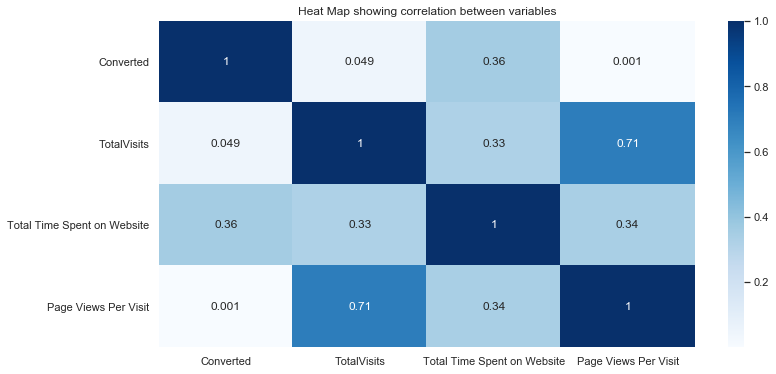

In [314]:
# Heatmap to visualise the correlation between different variables of the dataframe. 

plt.figure(figsize = (12,6))
plt.title('Heat Map showing correlation between variables')
sns.heatmap(leads.corr() , annot=True, cmap='Blues')
plt.show()

## Data Preparation

In [315]:
# Reading the dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Not Provided,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Not Provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Mumbai,No,Modified


<font color=grey>
<b> Renaming variables names to give shorter names</b>
</font>

In [316]:
# Renaming Columns
leads.rename(columns={'A free copy of Mastering The Interview':'Free Interview Copy','What is your current occupation':'Current Occupation','Total Time Spent on Website':'Time on Website'}, inplace=True)

In [317]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,City,Free Interview Copy,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Not Provided,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Not Provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Mumbai,No,Modified


### Create Dummies for Categorical Variables

<font color=grey>
<b>We could have converted 'Do Not Email' and 'Free Interview Copy' columns to 0s and 1s before creating dummies. But since the variables count for this dataset is just 13 we can create dummies for the same. If the variable count is too large then it is a good approach to convert variables having only 2 categories directly to 0s and 1s.
</b>
</font>

In [318]:
# Dummy variable for categorical columns and use drop_first to drop the first column (alphabetically) to reduce no. of columns
leads_dummies =  pd.get_dummies(leads[['Specialization','Lead Origin','Lead Source','Do Not Email','Last Activity','Current Occupation','City','Free Interview Copy','Last Notable Activity']], drop_first=True)
leads_dummies

,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Not Provided,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

<font color=grey>
<br>Removing the unnecessary columns which do not provide any insight </br>
</font>

In [ ]:
leads_dummies = leads_dummies.drop(['Specialization_Not Provided'], 1)
leads_dummies = leads_dummies.drop(['Current Occupation_Not Provided'], 1)
leads_dummies = leads_dummies.drop(['City_Not Provided'], 1)

<font color=grey>
<br> Concatenating the dummies and original dataframes</br>
</font>

In [320]:
# Concatenating dataframes to create the final dataframe with all the necessary columns
leads = pd.concat([leads,leads_dummies], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Website,Page Views Per Visit,Last Activity,Specialization,Current Occupation,City,Free Interview Copy,Last Notable Activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Not Provided,No,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Not Provided,No,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Mumbai,No,Modif

<font color=grey>
<br> Removing the redundant columns as dummies have already been created for them.</br>
</font>

In [321]:
# Drop redundant columns as they have already been dummified
leads = leads.drop('Specialization' , axis=1)
leads = leads.drop('Lead Origin' , axis=1)
leads = leads.drop('Lead Source' , axis=1)
leads = leads.drop('Do Not Email' , axis=1)
leads = leads.drop('Last Activity' , axis=1)
leads = leads.drop('Current Occupation' , axis=1)
leads = leads.drop('City' , axis=1)
leads = leads.drop('Free Interview Copy' , axis=1)
leads = leads.drop('Last Notable Activity' , axis=1)
leads

,Converted,TotalVisits,Time on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

## Train-Test Split

<font color=grey>
<br> Dividing Train and Test datasets</br>
</font>

In [322]:
# Train-Test division of leads dataframe
leads_train, leads_test = train_test_split( leads , train_size=0.7, random_state=100)
print(leads_train.shape)
print(leads_test.shape)

(6351, 86)
(2723, 86)


<font color=grey>
<br>Scaling the continuous variables using MinMax scaler so that values are on a same scale</br>
</font>

In [323]:
# Scaling the continuous/numerical variables using Standard method
scaler = MinMaxScaler()
continuous_vars = ['TotalVisits','Time on Website','Page Views Per Visit']

leads_train[continuous_vars] = scaler.fit_transform(leads_train[continuous_vars])
leads_train.describe()

,Converted,TotalVisits,Time on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,0.197171,0.217585,0.261393,0.040309,0.006456,0.011967,0.104393,0.017635,0.012282,0.094316,0.040938,0.019682,0.091324,0.022359,0.054795,0.011967,0.008818,0.003779,0.037632,0.021886,0.535979,0.068651,0.003779,0.278066,0.003936,0.320737,0.000315,0.000157,0.186427,0.127224,0.000157,0.000157,0.051645,0.013384,0.

In [324]:
### Checking the Conversion Rate
initial_leads_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
initial_leads_rate

37.85541106458012

In [325]:
# Segregate X_train and y_train and remove the target variable for which prediction is to be made.
y_train = leads_train.pop('Converted')
X_train = leads_train

In [326]:
# plt.figure(figsize = (20,20))
# sns.heatmap(leads.corr() , annot=True, cmap='YlGnBu')
# plt.show()

In [327]:
# Correlation between variables 
Correlation = leads.corr()
Correlation

,Converted,TotalVisits,Time on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.048849,0.359261,0.001005,0.026549,-0.001661,-0.006241,0.043580,0.029621,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.008391,0.008560,-0.014207,0.020193,-0.008421,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029022,0.019024,0.013451,-0.124085,-0.000581,-0.008194,-0.011588,0.255480,-0.031812,0.003718,0.013451,0.150027,-0.011237,-0.008194,-0.008194,-0.008194,-0.008194,-0.140786,-0.115775,-0.127327,-0.037746,0.019024,-0.023051,0.019024,-0.032183,0.045672,-0.208619,-0.080999,0.013451,0.335815,-0.011625,-0.023562,-0.011237,-0.008194,0.040372,0.018578,-0.006074,0.126822,0.316246,0.012585,0.028551,0.012849,0.041365,-0.007612,-0.030860,-0.038445,-0.034043,0.019024,-0.013084,0.013451,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.048849,1.000000,0.328090,0.705080,0.063974,0.026352,0.037890,0.078799,0.052521,0.026792,0.085929,0.044851,0.053713,0.039242,0.065618,0.038761,0.046314,0.048156,0.026227,0.058261,0.098694,0.408633,-0.245896,-0.054484,0.116747,-0.053220,0.176521,-0.015264,0.011805,-0.450591,0.288449,-0.001108,0.025827,-0.214184,0.086377,-0.003850,-0.004336,-0.115437,-0.009306,0.002120,0.005349,-0.004336,0.002120,0.011474,-0.098606,-0.064547,-0.029803,0.002999,0.047392,0.009847,0.021173,0.028071,-0.198609,0.247280,-0.010792,0.0

## Model Building

## Train Data Analysis

##### Running Initial Model - GLM

In [328]:
# Logistic regression model - Initial Model
Initial_Model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Initial_Model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2460.0
Date:                Mon, 01 Jun 2020   Deviance:                       4919.9
Time:                        18:26:45   Pearson chi2:                 6.16e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 22.3472   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                            1.5355      0.276      5.557      0.000       0.994       2.077
Time on Website                                        4.5957      0.173     26.534      0.000       4.256       4.935
Page Views Per Visit                                  -1.0987      0.267     -4.114      0.000      -1.622      -0.575
Specialization_Business Administration                 0.4472      0.205      2.182      0.029       0.045       0.849
Specialization_E-Business                              0.9576      0.437      2.192      0.028       0.101       1.814
Specialization_E-COMMERCE                              0.7601      0.346      2.199      0.028       0.083       1.438
Specialization_Finance Management                      0.5750      0.153      3.747      0.000       0.274       0.876
Specialization_Healthcare Management                   0.5536      0.285      1.944      0.052      -0.005       1.112
Specialization_Hospitality Management                  0.1033      0.345      0.299      0.765      -0.573       0.780
Specialization_Human Resource Management               0.5121      0.155      3.313      0.001       0.209       0.815
Specialization_IT Projects Management                  0.6551      0.213      3.071      0.002       0.237       1.073
Specialization_International Business                  0.4036      0.262      1.541      0.123      -0.110       0.917
Specialization_Marketing Management                    0.7198      0.153      4.690      0.000       0.419       1.021
Specialization_Media and Advertising                   0.2501      0.258      0.971      0.332      -0.255       0.755
Specialization_Operations Management                   0.4805      0.189      2.538      0.011       0.109       0.852
Specialization_Retail Management                       0.2747      0.344      0.798      0.425      -0.400       0.949
Specialization_Rural and Agribusiness                  0.4372      0.398      1.100      0.271      -0.342       1.216
Specialization_Services Excellence                     0.1215      0.690      0.176      0.860      -1.231       1.474
Specialization_Supply Chain Management                 0.5231      0.214      2.447      0.014       0.104       0.942
Specialization_Travel and Tourism                      0.3931      0.279      1.407      0.160      -0.155       0.941
Lead Origin_Landing Page Submission                   -0.5475      0.131     -4.166      0.000      -0.805      -0.290
Lead Origin_Lead Add Form                             -0.9087      1.563     -0.581      0.561      -3.972  

##### Feature Selection using RFE -  Top 15 variables

In [329]:
# Instantiate Logistic Regression
logreg = LogisticRegression()

In [330]:
# Defining the number of features you want to select. Also fit it on the dataset
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [331]:
# This feature denotes which columns are in the Top 15, True-Present, False-Not Present
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

In [332]:
# Display the column names with the True/False values
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Time on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 30),
 ('Specialization_Finance Management', False, 35),
 ('Specialization_Healthcare Management', False, 34),
 ('Specialization_Hospitality Management', False, 65),
 ('Specialization_Human Resource Management', False, 37),
 ('Specialization_IT Projects Management', False, 33),
 ('Specialization_International Business', False, 43),
 ('Specialization_Marketing Management', False, 29),
 ('Specialization_Media and Advertising', False, 54),
 ('Specialization_Operations Management', False, 38),
 ('Specialization_Retail Management', False, 53),
 ('Specialization_Rural and Agribusiness', False, 39),
 ('Specialization_Services Excellence', False, 69),
 ('Specialization_Supply Chain Management', False, 36),
 ('Specialization_Travel and Tourism', False, 44),
 ('Lead O

In [333]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]

In [334]:
# Columns excluded by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_

##### Assessing the Prepared Model - GLM - with the selected columns

In [335]:
# Building the Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.3
Date:                Mon, 01 Jun 2020   Deviance:                       5328.5
Time:                        18:26:56   Pearson chi2:                 6.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7637      0.095    -29.133      0.000      -2.950      -2.578
Time on Website                             3.8351      0.145     26.439      0.000       3.551       4.119
Lead Origin_Lead Add Form                   3.0480      0.218     13.964      0.000       2.620       3.476
Lead Source_Direct Traffic                 -0.5899      0.078     -7.591      0.000      -0.742      -0.438
Lead Source_Referral Sites                 -0.6470      0.337     -1.919      0.055      -1.308       0.014
Lead Source_Welingak Website                1.9623      0.751      2.615      0.009       0.491       3.433
Do Not Email_Yes                           -1.5801      0.170     -9.311      0.000      -1.913      -1.248
Last Activity_Had a Phone Conversation      2.3842      0.727      3.280      0.001       0.960       3.809
Last Activity_Olark Chat Conversation      -0.9280      0.162     -5.727      0.000      -1.246      -0.610
Last Activity_SMS Sent                      1.2970      0.074     17.647      0.000       1.153       1.441
Current Occupation_Housewife               23.6517   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
Current Occupation_Other                    1.9948      0.713      2.796      0.005       0.596       3.393
Current Occupation_Student                  1.4372      0.229      6.276      0.000       0.988       1.886
Current Occupation_Unemployed               1.1977      0.087     13.805      0.000       1.028       1.368
Current Occupation_Working Professional     3.6304      0.196     18.540      0.000       3.247       4.014
Last Notable Activity_Unreachable           1.9547      0.495      3.952      0.000       0.985       2.924
===========================================================================================================
"""

In [336]:
# Creating a dataframe with the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Current Occupation_Unemployed,2.08
0,Time on Website,1.85
1,Lead Origin_Lead Add Form,1.60
8,Last Activity_SMS Sent,1.52
2,Lead Source_Direct Traffic,1.42
4,Lead Source_Welingak Website,1.33
13,Current Occupation_Working Professional,1.31
5,Do Not Email_Yes,1.08
7,Last Activity_Olark Chat Conversation,1.05
11,Current Occupation_Student,1.04


In [337]:
# Deleting column because it has very high P value
col = col.drop('Current Occupation_Housewife', 1)

In [338]:
# Building the Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.2
Date:                Mon, 01 Jun 2020   Deviance:                       5344.4
Time:                        18:26:56   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7371      0.094    -29.116      0.000      -2.921      -2.553
Time on Website                             3.8373      0.145     26.501      0.000       3.553       4.121
Lead Origin_Lead Add Form                   3.1039      0.219     14.200      0.000       2.675       3.532
Lead Source_Direct Traffic                 -0.5887      0.078     -7.587      0.000      -0.741      -0.437
Lead Source_Referral Sites                 -0.6508      0.337     -1.933      0.053      -1.311       0.009
Lead Source_Welingak Website                1.9098      0.751      2.544      0.011       0.438       3.381
Do Not Email_Yes                           -1.5846      0.170     -9.336      0.000      -1.917      -1.252
Last Activity_Had a Phone Conversation      2.3799      0.726      3.276      0.001       0.956       3.804
Last Activity_Olark Chat Conversation      -0.9363      0.162     -5.783      0.000      -1.254      -0.619
Last Activity_SMS Sent                      1.2886      0.073     17.555      0.000       1.145       1.432
Current Occupation_Other                    1.9686      0.713      2.759      0.006       0.570       3.367
Current Occupation_Student                  1.4093      0.229      6.158      0.000       0.961       1.858
Current Occupation_Unemployed               1.1721      0.086     13.628      0.000       1.004       1.341
Current Occupation_Working Professional     3.6037      0.195     18.435      0.000       3.221       3.987
Last Notable Activity_Unreachable           1.9412      0.494      3.930      0.000       0.973       2.909
===========================================================================================================
"""

In [339]:
# Creating a dataframe with the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Current Occupation_Unemployed,2.07
0,Time on Website,1.85
1,Lead Origin_Lead Add Form,1.59
8,Last Activity_SMS Sent,1.52
2,Lead Source_Direct Traffic,1.42
4,Lead Source_Welingak Website,1.33
12,Current Occupation_Working Professional,1.31
5,Do Not Email_Yes,1.08
7,Last Activity_Olark Chat Conversation,1.05
10,Current Occupation_Student,1.04


In [340]:
# Deleting column because it has very high P value
col = col.drop('Lead Source_Referral Sites', 1)

In [341]:
# Building the Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.2
Date:                Mon, 01 Jun 2020   Deviance:                       5348.5
Time:                        18:26:56   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7493      0.094    -29.310      0.000      -2.933      -2.565
Time on Website                             3.8357      0.145     26.497      0.000       3.552       4.119
Lead Origin_Lead Add Form                   3.1143      0.219     14.251      0.000       2.686       3.543
Lead Source_Direct Traffic                 -0.5780      0.077     -7.468      0.000      -0.730      -0.426
Lead Source_Welingak Website                1.9092      0.751      2.543      0.011       0.438       3.381
Do Not Email_Yes                           -1.5819      0.170     -9.325      0.000      -1.914      -1.249
Last Activity_Had a Phone Conversation      2.3772      0.729      3.262      0.001       0.949       3.806
Last Activity_Olark Chat Conversation      -0.9436      0.162     -5.821      0.000      -1.261      -0.626
Last Activity_SMS Sent                      1.2938      0.073     17.638      0.000       1.150       1.438
Current Occupation_Other                    1.9781      0.713      2.773      0.006       0.580       3.376
Current Occupation_Student                  1.4172      0.229      6.192      0.000       0.969       1.866
Current Occupation_Unemployed               1.1723      0.086     13.642      0.000       1.004       1.341
Current Occupation_Working Professional     3.5992      0.195     18.412      0.000       3.216       3.982
Last Notable Activity_Unreachable           1.9155      0.495      3.873      0.000       0.946       2.885
===========================================================================================================
"""

In [342]:
# Creating a dataframe with the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Current Occupation_Unemployed,2.07
0,Time on Website,1.85
1,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.52
2,Lead Source_Direct Traffic,1.42
3,Lead Source_Welingak Website,1.33
11,Current Occupation_Working Professional,1.31
4,Do Not Email_Yes,1.08
6,Last Activity_Olark Chat Conversation,1.05
9,Current Occupation_Student,1.04


#### We have very small VIF values for all the columns so we are not removing any more columns.
##### If the VIF would have been more than 5 we would have removed the columns and created and ran the GLM model again.

#### List of features remaining in or model after RFE selection and manual removal of features based on P value and VIF

Current Occupation_Unemployed<br>
Time on Website<br>
Lead Origin_Lead Add Form<br>
Last Activity_SMS Sent<br>
Lead Source_Direct Traffic<br>
Lead Source_Welingak Website<br>
Current Occupation_Working Professional<br>
Do Not Email_Yes<br>
Last Activity_Olark Chat Conversation<br>
Current Occupation_Student<br>
Last Activity_Had a Phone Conversation<br>
Current Occupation_Other<br>
Last Notable Activity_Unreachable

#### Top 3 Positive
Time on Website: 3.83<br>
Last Activity_Had a Phone Conversation: 3.59<br>
Lead Origin_Lead Add Form: 3.11<br>

#### Top 3 Negative
Do Not Email_Yes: -1.58<br>
Last Activity_Olark Chat Conversation: -0.94<br>
Lead Source_Direct Traffic: -0.57<br>

## Metric Evaluation - Train Dataset

In [343]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.066403
1012    0.272354
9226    0.429649
4750    0.585234
7987    0.866238
1281    0.804123
2880    0.060515
4971    0.912080
7536    0.777859
1248    0.847895
dtype: float64

In [344]:
# Reshaping the above predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06640286, 0.27235352, 0.42964867, 0.58523429, 0.86623799,
       0.80412328, 0.06051451, 0.9120805 , 0.77785897, 0.84789502])

##### Create dataframe with ACTUAL Converted Flag 0/1

In [345]:
# Create a dataframe with ACTUAL Converted Flag and the Predictions that the model gave

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.066403,3009
1,0,0.272354,1012
2,0,0.429649,9226
3,1,0.585234,4750
4,1,0.866238,7987


##### Create dataframe with PREDICTED Converted Flag 0/1   -   Taking initial probability value as 0.5

In [346]:
# Creating a new column "predicted" where assign value 1 if the Converted Probability is greater than 0.5

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.066403,3009,0
1,0,0.272354,1012,0
2,0,0.429649,9226,0
3,1,0.585234,4750,1
4,1,0.866238,7987,1


### INITIAL CONFUSION MATRIX - TRAIN

In [347]:
# Calculating Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3428  477]
 [ 796 1650]]


In [348]:
# Predicted     not_converted    converted 
# Actual
# not_converted         3248      477
# converted             796       1650  

##### Initial Train dataset - Accuracy

In [349]:
# Checking the accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7995591245473154


### Metrics Evaluation- Sensitivity, Specificity, False Positive Rate, True Positive Rate

In [350]:
# Categorizing matrix values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Initial Train dataset - Sensitivity

In [351]:
# SENSITIVITY
TP / float(TP+FN)

0.6745707277187244

##### Initial Train dataset - Specificity

In [352]:
# SPECIFICITY
TN / float(TN+FP)

0.8778489116517285

In [353]:
# FALSE POSITIVE RATE - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.12215108834827144


In [354]:
# POSITIVE PREDICTIVE VALUE 
print (TP / float(TP+FP))

0.7757404795486601


In [355]:
# NEGATIVE PREDICTIVE VALUE 
print (TN / float(TN+ FN))

0.8115530303030303


## Plotting the ROC curve

In [356]:
# ROC Curve Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [357]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

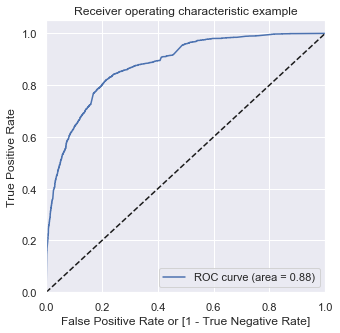

In [358]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding the optimal cut-off point
#### Optimal cut off probability is the probability where we have balanced specificity and sensitivity

In [359]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066403,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.272354,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.429649,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.585234,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.866238,7987,1,1,1,1,1,1,1,1,1,1,0


In [360]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# Info
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.609195     0.980785     0.376440
0.2          0.2  0.723980     0.887980     0.621255
0.3          0.3  0.790427     0.842600     0.757746
0.4          0.4  0.804598     0.782093     0.818694
0.5          0.5  0.799559     0.674571     0.877849
0.6          0.6  0.794206     0.588716     0.922919
0.7          0.7  0.778303     0.506132     0.948784
0.8          0.8  0.755629     0.414554     0.969270
0.9          0.9  0.708550     0.257972     0.990781


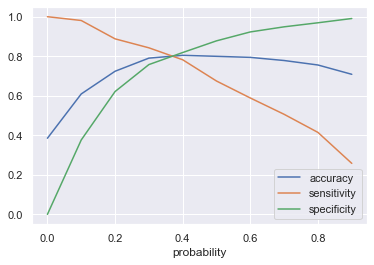

In [361]:
# PLot the curve of accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity']).grid(zorder=0)
plt.show()

### The above diagram shows the 0.35 is the optimal cut off probability

In [362]:
# Predicting again with probability value 0.35,if Converted_Prob > 0.35 assign 1 else 0

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066403,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.272354,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.429649,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.585234,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.866238,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [363]:
# Adding the Lead Score variable to the Precision and Recall Dataframe
y_train_pred_final['Lead Score'] = 10 * y_train_pred_final['Converted_Prob']
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.066403,3009,0,1,0,0,0,0,0,0,0,0,0,0,0.664029
1,0,0.272354,1012,0,1,1,1,0,0,0,0,0,0,0,0,2.723535
2,0,0.429649,9226,0,1,1,1,1,1,0,0,0,0,0,1,4.296487
3,1,0.585234,4750,1,1,1,1,1,1,1,0,0,0,0,1,5.852343
4,1,0.866238,7987,1,1,1,1,1,1,1,1,1,1,0,1,8.662380


In [364]:
# Creating the confusion matrix again 
confusion_matrix_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_matrix_final

array([[3097,  808],
       [ 466, 1980]], dtype=int64)

### FINAL CONFUSION MATRIX - TRAIN

In [365]:
# Predicted     not_converted     converted 
# Actual
# not_converted        3097      808
# converted            466       1980

##### Final Train dataset - Accuracy

In [366]:
# Checking the final accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7994016690284994


### Final Metrics Evaluation - Sensitivity, Specificity, False Positive Rate, True Positive Rate

In [367]:
# Categorizing matrix values
TP = confusion_matrix_final[1,1] # true positive 
TN = confusion_matrix_final[0,0] # true negatives
FP = confusion_matrix_final[0,1] # false positives
FN = confusion_matrix_final[1,0] # false negatives

##### Final Train dataset - Sensitivity

In [368]:
# SENSITIVITY
TP / float(TP+FN)

0.8094848732624693

##### Final Train dataset - Specificity

In [369]:
# SPECIFICITY
TN / float(TN+FP)

0.7930857874519847

In [370]:
# FALSE POSITIVE RATE - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.20691421254801537


In [371]:
# POSITIVE PREDICTIVE VALUE 
print (TP / float(TP+FP))

0.7101865136298422


In [372]:
# NEGATIVE PREDICTIVE VALUE 
print (TN / float(TN+ FN))

0.8692113387594723


## Test Data Analysis

In [373]:
# Perform only transform function on TEST dataset
leads_test[continuous_vars] = scaler.transform(leads_test[continuous_vars])
leads_test.describe()

,Converted,TotalVisits,Time on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Free Interview Copy_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.00000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0
mean,0.363202,0.195459,0.215404,0.257209,0.052516,0.005876,0.012853,0.108704,0.016159,0.012119,0.087404,0.038928,0.018729,0.089240,0.022035,0.055454,0.008814,0.006243,0.005876,0.039295,0.023136,0.543885,0.053250,0.002203,0.285347,0.002203,0.307014,0.0,0.0,0.208961,0.127066,0.0,0.000367,0.042233,0.01469,0.0,0.000367,0.010283,0.001102,0.0,0.0,0.0,0.0,0.078957,0.052883,0.033786,0.032317,0.0,0.388542,0.0,0.01

In [374]:
# Selecting leads_test[col] dataset into X_test for analysis
X_test = leads_test[col]
X_test.head()

,Time on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Last Notable Activity_Unreachable
3271,0.070530,0,0,0,0,0,0,0,0,0,0,0,0
1490,0.679695,0,1,0,0,0,0,0,0,0,0,1,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0,0,0
4216,0.000000,1,0,0,0,0,0,0,0,1,0,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0,0,0


In [375]:
# Adding constant to test dataset
X_test_sm = sm.add_constant(X_test)

## Metric Evaluation - Test Dataset

In [376]:
y_test_pred = res.predict(X_test_sm)

In [377]:
# Displaying rows
y_test_pred[:10]

3271    0.077357
1490    0.946793
7936    0.067747
4216    0.855965
3830    0.078222
1800    0.727270
6507    0.484754
4821    0.272905
4223    0.944327
4714    0.189146
dtype: float64

In [378]:
# Converting y_pred to a dataframe which is an array
y_pred_array = pd.DataFrame(y_test_pred)

In [379]:
# Look at the dataframe
y_pred_array.head()

,0
3271,0.077357
1490,0.946793
7936,0.067747
4216,0.855965
3830,0.078222


In [380]:
# Converting leads_test into y_yesy for future analysis
y_test = leads_test.pop('Converted')

In [381]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [382]:
# Putting Lead ID as index column in y_test
y_test_df['Lead ID'] = y_test_df.index

In [383]:
# Removing index for both dataframes to append them side by side 
y_pred_array.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [384]:
# Appending y_test_df and y_pred_array
y_pred_final = pd.concat([y_test_df, y_pred_array],axis=1)

In [385]:
# Viewing the dataframe
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.077357
1,1,1490,0.946793
2,0,7936,0.067747
3,1,4216,0.855965
4,0,3830,0.078222


In [386]:
# Renaming the column "0" as Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [387]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)

In [388]:
# Predicting the test dataset with probability value 0.35 as calculated in the train dataset,if Converted_Prob > 0.35 assign 1 else 0

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.077357,0
1,1490,1,0.946793,1
2,7936,0,0.067747,0
3,4216,1,0.855965,1
4,3830,0,0.078222,0


In [389]:
# Adding the Lead Score variable to the Precision and Recall Dataframe
y_pred_final['Lead Score'] = 10 * y_pred_final['Converted_Prob']
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted,Lead Score
0,3271,0,0.077357,0,0.773570
1,1490,1,0.946793,1,9.467935
2,7936,0,0.067747,0,0.677466
3,4216,1,0.855965,1,8.559653
4,3830,0,0.078222,0,0.782223


##### Final Test dataset - Accuracy

In [390]:
# Checking the accuracy score
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8075651854572163

### FINAL CONFUSION MATRIX - TEST

In [391]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1404,  330],
       [ 194,  795]], dtype=int64)

In [392]:
# Predicted     not_converted     converted 
# Actual
# not_converted        1404      330
# converted            194       795

### Final Metrics Evaluation - Sensitivity, Specificity, False Positive Rate, True Positive Rate

In [393]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

##### Final Test dataset - Sensitivity

In [394]:
# SENSITIVITY OF TEST DATASET
TP / float(TP+FN)

0.8038422649140546

##### Final Test dataset - Specificity

In [395]:
# SPECIFICITY OF TEST DATASET
TN / float(TN+FP)

0.8096885813148789

In [396]:
# FALSE POSITIVE RATE - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.1903114186851211


In [397]:
# POSITIVE PREDICTIVE VALUE 
print (TP / float(TP+FP))

0.7066666666666667


In [398]:
# NEGATIVE PREDICTIVE VALUE 
print (TN / float(TN+ FN))

0.8785982478097623


# PRECISION & RECALL

## Train Dataset

##### Initial Train dataset - Accuracy

In [399]:
# Initial Accuracy Score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7995591245473154


##### Initial Confusion Matrix with probability cut off of 0.5

In [400]:
# Looking at the initial confusion matrix where we took the cut off as 0.5

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3428  477]
 [ 796 1650]]


In [401]:
# Categorizing matrix values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### InItial Precision - Train

In [402]:
# Precision
TP / (TP+FP)

0.7757404795486601

##### Initial Recall - Train

In [403]:
# Recall
TP / (TP+FN)

0.6745707277187244

#### Calculating Precision & Recall Score on train dataset using inbuilt function

In [404]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7757404795486601

In [405]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6745707277187244

### Precision & Recall Tradeoff

In [406]:
# Displaying column values
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [407]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

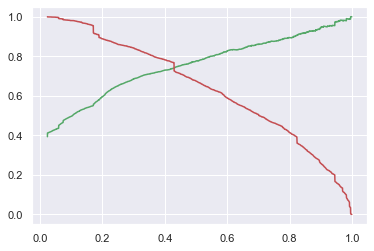

In [408]:
# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the above plot we can see that 0.41 seems as a better cut off value

In [409]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.066403,3009,0,1,0,0,0,0,0,0,0,0,0,0,0.664029
1,0,0.272354,1012,0,1,1,1,0,0,0,0,0,0,0,0,2.723535
2,0,0.429649,9226,0,1,1,1,1,1,0,0,0,0,0,1,4.296487
3,1,0.585234,4750,1,1,1,1,1,1,1,0,0,0,0,1,5.852343
4,1,0.866238,7987,1,1,1,1,1,1,1,1,1,1,0,1,8.662380


In [410]:
# Adding the Lead Score variable to the Precision and Recall Dataframe
y_train_pred_final['Lead Score'] = 10 * y_train_pred_final['Converted_Prob']
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.066403,3009,0,1,0,0,0,0,0,0,0,0,0,0,0.664029
1,0,0.272354,1012,0,1,1,1,0,0,0,0,0,0,0,0,2.723535
2,0,0.429649,9226,0,1,1,1,1,1,0,0,0,0,0,1,4.296487
3,1,0.585234,4750,1,1,1,1,1,1,1,0,0,0,0,1,5.852343
4,1,0.866238,7987,1,1,1,1,1,1,1,1,1,1,0,1,8.662380


##### Final Train dataset - Accuracy

In [411]:
# Checking the accuracy based on precision/recall
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8044402456306093


##### Final Confusion Matrix with probability cut off of 0.41

In [412]:
# Looking at the previous confusion matrix again

confusion_matrix_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion_matrix_final)

[[3208  697]
 [ 545 1901]]


In [413]:
# Categorizing matrix values
TP = confusion_matrix_final[1,1] # true positive 
TN = confusion_matrix_final[0,0] # true negatives
FP = confusion_matrix_final[0,1] # false positives
FN = confusion_matrix_final[1,0] # false negatives

##### Final Precision - Train

In [414]:
# Precision
TP/(TP+FP)

0.7317167051578137

##### Final Recall - Train

In [415]:
# Recall
TP/(TP+FN)

0.7771872444807849

## Test Dataset

In [416]:
y_test_pred = res.predict(X_test_sm)

In [417]:
# Displaying rows
y_test_pred[:10]

3271    0.077357
1490    0.946793
7936    0.067747
4216    0.855965
3830    0.078222
1800    0.727270
6507    0.484754
4821    0.272905
4223    0.944327
4714    0.189146
dtype: float64

In [418]:
# Converting y_pred to a dataframe which is an array
y_pred_array = pd.DataFrame(y_test_pred)
y_pred_array.head()

,0
3271,0.077357
1490,0.946793
7936,0.067747
4216,0.855965
3830,0.078222


In [419]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [420]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [421]:
# Removing index for both dataframes to append them side by side 
y_pred_array.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [422]:
# Appending y_test_df and y_pred_array
y_pred_final = pd.concat([y_test_df, y_pred_array],axis=1)

In [423]:
# Viewing the dataframe
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.077357
1,1,1490,0.946793
2,0,7936,0.067747
3,1,4216,0.855965
4,0,3830,0.078222


In [424]:
# Renaming the column "0" as Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [425]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_Prob'], axis=1)

In [426]:
# Predicting the test dataset with probability value 0.41 as calculated in the train dataset,if Converted_Prob > 0.41 assign 1 else 0

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.077357,0
1,1490,1,0.946793,1
2,7936,0,0.067747,0
3,4216,1,0.855965,1
4,3830,0,0.078222,0


In [427]:
# Adding the Lead Score variable to the Precision and Recall Dataframe
y_pred_final['Lead Score'] = 10 * y_pred_final['Converted_Prob']
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted,Lead Score
0,3271,0,0.077357,0,0.773570
1,1490,1,0.946793,1,9.467935
2,7936,0,0.067747,0,0.677466
3,4216,1,0.855965,1,8.559653
4,3830,0,0.078222,0,0.782223


##### Final Test dataset - Accuracy

In [428]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8127065736320235

##### Final Confusion Matrix with probability cut off of 0.41

In [429]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1450,  284],
       [ 226,  763]], dtype=int64)

In [430]:
# Categorizing matrix values
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

##### Final Precision - Test

In [431]:
# Precision
Precision = TP/(TP+FP)
Precision

0.728748806112703

##### Final Recall - Test

In [432]:
# Recall
Recall = TP/(TP+FN)
Recall

0.7714863498483316

# F1 SCORE
##### F1 = 2 * (precision * recall) / (precision + recall)

In [433]:
F1 = round(2 * (Precision*Recall)/(Precision+Recall),2)
F1

0.75